In [1]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
%cd "/content/gdrive/My Drive/Cursos/IA (Sistemas Inteligentes)/English Feb Jun/Content/3 Supervised Learning (Regression)"
!ls

/content/gdrive/My Drive/Cursos/IA (Sistemas Inteligentes)/English Feb Jun/Content/3 Supervised Learning (Regression)
 iris.data		    machine.names
 iris.names		    Non_lineal_models_example.docx
 Linaer_reg_examples.docx   Scaling_examples.docx
 linear_reg_gd.py	   'Supervised Learning Regression.gdoc'
'Linear Regrssion.ipynb'   'transforming data.ipynb'
 machine.data


In [3]:
import pandas as pd

#the file has no names for columns.
columns = ['vendor','Model','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX' ,'PRP' ,'ERP']


df = pd.read_csv('machine.data',names = columns)
#we check the names of the columns on the on name file. 
df.head()

,vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [6]:
df_y = df['ERP']
df = df[['MYCT', 'MMIN', 'MMAX','CACH','CHMIN' , 'CHMAX' , 'PRP']]
df.head()

KeyError: ignored

improt prerprocessin library

In [7]:
from sklearn import preprocessing

Standarization

In [8]:
scaler = preprocessing.StandardScaler().fit(df)

scaled = scaler.transform(df)
scaled.shape

(209, 7)

Change back to pandas data frame in case you want to do further preprocessing or plotting.

In [9]:
scaled_df = pd.DataFrame(scaled, columns=['MYCT', 'MMIN', 'MMAX','CACH','CHMIN' , 'CHMAX' , 'PRP'])
scaled_df.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,-0.303586,-0.675026,-0.495462,5.694208,1.661989,4.231033,0.575759
1,-0.673330,1.326291,1.727049,0.167629,0.485509,0.529479,1.018277
2,-0.673330,1.326291,1.727049,0.167629,0.485509,0.529479,0.712877
3,-0.673330,1.326291,1.727049,0.167629,0.485509,0.529479,0.413710
4,-0.673330,1.326291,0.359350,0.167629,0.485509,-0.087447,0.164405


Normalization

In [10]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = preprocessing.MinMaxScaler()
data_minmax = min_max_scaler.fit_transform(df)
data_minmax

array([[0.07282535, 0.00601202, 0.09284284, ..., 0.30769231, 0.72727273,
        0.16783217],
       [0.00809171, 0.24849699, 0.4994995 , ..., 0.15384615, 0.18181818,
        0.2298951 ],
       [0.00809171, 0.24849699, 0.4994995 , ..., 0.15384615, 0.18181818,
        0.18706294],
       ...,
       [0.07282535, 0.06062124, 0.12412412, ..., 0.03846154, 0.07954545,
        0.04020979],
       [0.31220499, 0.01402806, 0.12412412, ..., 0.        , 0.        ,
        0.05332168],
       [0.31220499, 0.02930862, 0.06156156, ..., 0.        , 0.        ,
        0.03409091]])

In [11]:
scaled_df = pd.DataFrame(data_minmax, columns=['MYCT', 'MMIN', 'MMAX','CACH','CHMIN' , 'CHMAX' , 'PRP'])
scaled_df.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,0.072825,0.006012,0.092843,1.000,0.307692,0.727273,0.167832
1,0.008092,0.248497,0.499499,0.125,0.153846,0.181818,0.229895
2,0.008092,0.248497,0.499499,0.125,0.153846,0.181818,0.187063
3,0.008092,0.248497,0.499499,0.125,0.153846,0.181818,0.145105
4,0.008092,0.248497,0.249249,0.125,0.153846,0.090909,0.110140


Train a model with it

In [12]:
from sklearn.model_selection import train_test_split

X = scaled_df
y = df_y


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


Coefficients: 
 [ 53.14673995 228.80498809 207.20392082  26.24731003  30.30843027
  44.58892623 622.77363019]
Mean squared error: 966.23
Coefficient of determination: 0.96


Lets plot and see on just one variable

         MYCT      MMIN      MMAX      CACH     CHMIN     CHMAX       PRP
30   0.005394  0.039016  0.039977  0.511719  0.230769  0.136364  0.234266
106  0.258260  0.123246  0.124124  0.000000  0.019231  0.005682  0.022727
173  0.157114  0.014028  0.061562  0.000000  0.019231  0.039773  0.016608
144  0.028995  0.123246  0.249249  0.125000  0.019231  0.034091  0.069930
84   0.211059  0.029309  0.061562  0.000000  0.057692  0.034091  0.013986
..        ...       ...       ...       ...       ...       ...       ...
25   0.204316  0.014028  0.030280  0.015625  0.019231  0.017045  0.055070
62   0.072825  0.014028  0.014640  0.000000  0.153846  0.113636  0.026224
47   0.534727  0.029309  0.077202  0.000000  0.019231  0.005682  0.012238
159  0.026298  0.029309  0.061562  0.000000  0.019231  0.034091  0.009615
9    0.004046  1.000000  1.000000  0.500000  0.615385  0.363636  0.994755

[69 rows x 7 columns]


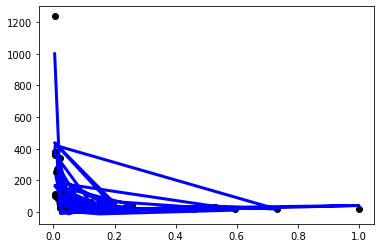

In [ ]:
import matplotlib.pyplot as plt
print(X_test)
# Plot outputs
plt.scatter(X_test['MYCT'], y_test,  color='black')
plt.plot(X_test['MYCT'], y_pred, color='blue', linewidth=3)


plt.show()

Not really working, lets make things cleaner

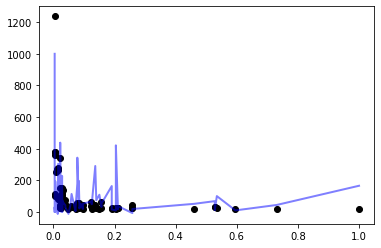

In [ ]:
#sort by value
test_df = pd.concat([X_test, y_test], axis=1)

test_df = test_df.sort_values(by='MYCT', ascending=False)

plt.scatter(test_df['MYCT'], test_df['ERP'],  color='black')
plt.plot(test_df['MYCT'], y_pred, color='blue', linewidth=2, alpha = .5)

plt.show()